<a href="https://colab.research.google.com/github/malysheva8434/python_files/blob/main/HW_Malysheva_Tatiana_ALATA22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
    
from nltk.tag import pos_tag
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
with open('/content/drive/MyDrive/Colab Notebooks/war.txt', 'r') as f:
  my_text = f.read()
  print(my_text)

Mounted at /content/drive
We are in camp five miles behind the line. Yesterday our relief arrived; now our bellies are full of bully beef and beans, we’ve had enough to eat and we’re well satisfied. We were even able to fill up a mess-tin for later, every one of us, and there are double rations of sausage and bread as well – that will keep us going. We haven’t had a stroke of luck like this for ages; the cook-sergeant, the one with the ginger hair, is actually offering to dish out food, beckoning with his serving ladle to anyone who comes near him and giving him a massive helping. He’s getting a bit worried because he can’t see how he’s going to empty his cooking pot. Tjaden and Muller have dug out a couple of washing bowls from somewhere and got him to fill them up to the brim as a reserve supply. Tjaden does things like that out of sheer greed; with Muller it’s a precaution. Nobody knows where Tjaden puts it all. He’s as thin as a rake and he always has been.
The most important thing

In [4]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


porter = PorterStemmer()
lancaster=LancasterStemmer()

text1=my_text.split('.')
text1=text1[:4]
text1 = ".".join(text1)
print(text1)

from nltk.tokenize import word_tokenize 
text_tokens = word_tokenize(str(text1))
text=text_tokens

punctuations='.,"-?:!;’'
for word in text:
    if word in punctuations:
        text.remove(word)


print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
for word in text:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),lancaster.stem(word)))

from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
     
text = pos_tag(nltk.word_tokenize(text1), tagset='universal')
print(text)

for t in text: # t is a tuple here
    if t[0] in punctuations:
        text.remove(t)
        
 
pos_tags_dict = {'NOUN' : 'n', 'VERB' : 'v', 'ADJ' : 'a', 'ADV' : 'r'}

# one letter pos tags are the only valid options for the lemmatizer
# so we need this dictionary to change our universal tags to these

text 
print("{0:20}{1:20}".format("Word","Lemma")) 
for t in text: 
    pos_tag = pos_tags_dict.get(t[1], 'n') 
    # if our tag is not in the dictionary, we get 'n' which is the default tag for the lemmatizer
    print ("{0:20}{1:20}".format(t[0],wordnet_lemmatizer.lemmatize(word=t[0], pos=pos_tag)))

from nltk.corpus import stopwords 
text_tokens = word_tokenize(text1) 
for i in text_tokens: 
    if i[0] in punctuations:
        text_tokens.remove(i)
tokens_without_sw = [word.lower() for word in text_tokens if not word in stopwords.words('english')]
#I have removed large letters from the text, as it will be without punctuation, and capital letters will look strange.
tokens_without_sw=' '.join(tokens_without_sw)

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
 
lemmatizer = WordNetLemmatizer()
 
# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION 
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

# tokenize the sentence and find the POS tag for each token
pos_tagged = nltk.pos_tag(nltk.word_tokenize(tokens_without_sw)) 
 
print(pos_tagged)

# As you may have noticed, the above pos tags are a little confusing.
 
# we use our own pos_tagger function to make things simpler to understand.
wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
lemmatized_sentence = []
for word, tag in wordnet_tagged:
    if tag is None:
        # if there is no available tag, append the token as is
        lemmatized_sentence.append(word)
    else:       
        # else use the tag to lemmatize the token
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
lemmatized_sentence = " ".join(lemmatized_sentence)
 
#Then I would like to compare 2 texts: one of them is lemmatized and without stopwords and punctuation, another one is non-lemmatized with punctuation and stopwords.
print('LEMMATIZED TEXT WITHOUT STOPWORDS AND PUNCTUATION: ', lemmatized_sentence)
print('NON-LEMMATIZED TEXT WITH PUNCTUATION AND STOPWORDS:', text1)

We are in camp five miles behind the line. Yesterday our relief arrived; now our bellies are full of bully beef and beans, we’ve had enough to eat and we’re well satisfied. We were even able to fill up a mess-tin for later, every one of us, and there are double rations of sausage and bread as well – that will keep us going. We haven’t had a stroke of luck like this for ages; the cook-sergeant, the one with the ginger hair, is actually offering to dish out food, beckoning with his serving ladle to anyone who comes near him and giving him a massive helping
Word                Porter Stemmer      lancaster Stemmer   
We                  we                  we                  
are                 are                 ar                  
in                  in                  in                  
camp                camp                camp                
five                five                fiv                 
miles               mile                mil                 
behind      

In [5]:
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[('Tjaden', 0.011515927874621587), ('good', 0.01585298856909749), ('day', 0.020531693983369487), ('school', 0.02551557560206042), ('Katczinsky', 0.027208489348468597)]
Tjaden good day school Katczinsky


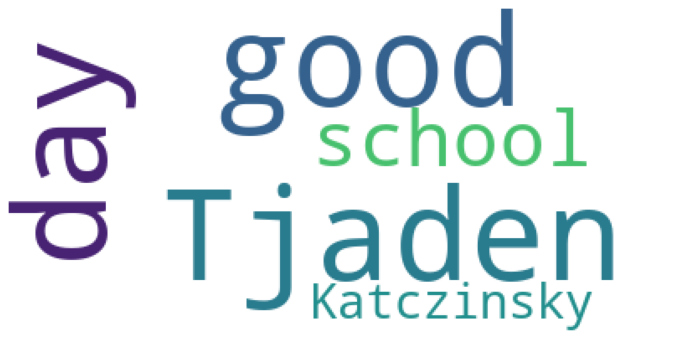

In [6]:
import yake
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

text_tokens = word_tokenize(my_text) 
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')] 
my_text1=' '.join(tokens_without_sw)

extractor = yake.KeywordExtractor (

    lan = "en",     # язык
    n = 1,          # максимальное количество слов в фразе
    dedupLim = 0.5, # порог похожести слов
    top = 5        # количество ключевых слов
)

y = extractor.extract_keywords(my_text1)
print(y)
x=[]
for i in y:
    x.append(i[0])
x=' '.join(x)
print(x)

import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(str(x))

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()


In [7]:
import spacy 
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')



In [9]:
print(my_text1)

We camp five miles behind line . Yesterday relief arrived ; bellies full bully beef beans , ’ enough eat ’ well satisfied . We even able fill mess-tin later , every one us , double rations sausage bread well – keep us going . We ’ stroke luck like ages ; cook-sergeant , one ginger hair , actually offering dish food , beckoning serving ladle anyone comes near giving massive helping . He ’ getting bit worried ’ see ’ going empty cooking pot . Tjaden Muller dug couple washing bowls somewhere got fill brim reserve supply . Tjaden things like sheer greed ; Muller ’ precaution . Nobody knows Tjaden puts . He ’ thin rake always . The important thing , though , double rations tobacco well . Ten cigars , twenty cigarettes two plugs chewing tobacco everyone , ’ decent amount . I ’ swapped chewing tobacco Katczinsky cigarettes , gives forty . You last day . And top , ’ really entitled lot . The army never good us . We ’ got mistake . Fourteen days ago sent line relief troops . It pretty quiet sec

In [ ]:
corpus = []

In [10]:
pip uninstall scipy

Found existing installation: scipy 1.9.3
Uninstalling scipy-1.9.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/scipy-1.9.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.8/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.9.3


In [11]:
pip install git+https://github.com/boudinfl/pke.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-kxluwuzj
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-kxluwuzj
  Using cached scipy-1.9.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)


In [12]:
import pke

In [13]:
pip uninstall networkx

Found existing installation: networkx 2.8.8
Uninstalling networkx-2.8.8:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/networkx-2.8.8.dist-info/*
    /usr/local/lib/python3.8/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.8.8/LICENSE.txt
    /usr/local/share/doc/networkx-2.8.8/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.8.8/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.8.8/examples/3d_drawing/plot_basic.py
    /usr/local/share/doc/networkx-2.8.8/examples/README.txt
    /usr/local/share/doc/networkx-2.8.8/examples/algorithms/README.txt
    /usr/local/share/doc/networkx-2.8.8/examples/algorithms/WormNet.v3.benchmark.txt
    /usr/local/share/doc/networkx-2.8.8/examples/algorithms/hartford_drug.edgelist
    /usr/local/share/doc/networkx-2.8.8/examples/algorithms/plot_beam_search.py
    /usr/local/share/doc/networkx-2.8.8/examples/algorithms/plot_betweenness_centrality.py
    /usr/local/share/doc/networkx-2.8.8/ex

In [14]:
pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)


In [21]:
#TopicRank
extractor=pke.unsupervised.TopicRank()
extractor.load_document(input=my_text1, language='en')
extractor.candidate_selection()
extractor.candidate_weighting()
keyphrases = extractor.get_n_best(n=5)
keyphrases

[('tjaden things', 0.04044773153837518),
 ('men', 0.0251670475119584),
 ('katczinsky', 0.024663235398254147),
 ('cook-sergeant', 0.022010808315213123),
 ('tjaden muller', 0.020341989314710464)]

In [37]:
extractor=pke.unsupervised.TextRank()
extractor.load_document(input=my_text1, language='en', normalization=None)
extractor.candidate_weighting(window=2, pos={'NOUN', 'PROPN', 'ADJ'}, top_percent=0.33)
keyphrases=extractor.get_n_best(n=5)
keyphrases

[('quantity food day', 0.03210996105069792),
 ('good food cushy', 0.03164441555931268),
 ('enough little bit', 0.031080760654071837),
 ('right front line', 0.02905814762891356),
 ('group head grub queue', 0.022911452603532657)]

# Новый раздел

# Новый раздел